In [45]:
# Detection Normalization Testing Based on Results from 
# G:\Shared drives\WEMpire-LAB\Current_projects\CellImaging-NIH\PYME-DH-fitting\20250121_Compute_Separable_Basis_Sets\20250329_Optimize_Filter_Sigma_via_Strength_Computation _Pixelate_First.nb


from sympy.parsing.mathematica import mathematica
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from math import exp
from scipy.special import erf as erf
from scipy.optimize import fsolve, fmin

In [46]:
s = 190/120
l=1025/120
A = 1

# a = (1 / (s**2 + filter_sigma**2)**6) * A**4 * s**8 * filter_sigma**8 
# b = exp((-(1+l)**2)/(4 * (s**2 + filter_sigma**2)))
# c = (1 - exp(l/(2 * (s**2 + filter_sigma**2))) * (-1 + l) + l)**2
# d = erf(1/(2 * np.sqrt(2) * np.sqrt(s**2 + filter_sigma**2)))**2
# e = exp((-1)/(4 * (s**2 + filter_sigma**2)))
# f = (erf((-1 + l)/(2 * np.sqrt(2) *np.sqrt(s**2 + filter_sigma**2))) - erf((1 + l)/(2 * np.sqrt(2) *np.sqrt(s**2 + filter_sigma**2))))**2
# strength = np.pi * np.sqrt(a * (b * c * d - e * f)**2)


strength = lambda filter_sigma : -np.sqrt( np.pi * np.sqrt(((1 / (s**2 + filter_sigma**2)**6) * A**4 * s**8 * filter_sigma**8 ) * ((exp((-(1+l)**2)/(4 * (s**2 + filter_sigma**2)))) * ((1 - exp(l/(2 * (s**2 + filter_sigma**2))) * (-1 + l) + l)**2) * (erf(1/(2 * np.sqrt(2) * np.sqrt(s**2 + filter_sigma**2)))**2) - (exp((-1)/(4 * (s**2 + filter_sigma**2)))) * ((erf((-1 + l)/(2 * np.sqrt(2) *np.sqrt(s**2 + filter_sigma**2))) - erf((1 + l)/(2 * np.sqrt(2) *np.sqrt(s**2 + filter_sigma**2))))**2))**2))

In [55]:
sig = np.linspace(l/3, 25, 1000)
y = list(map(strength, sig))

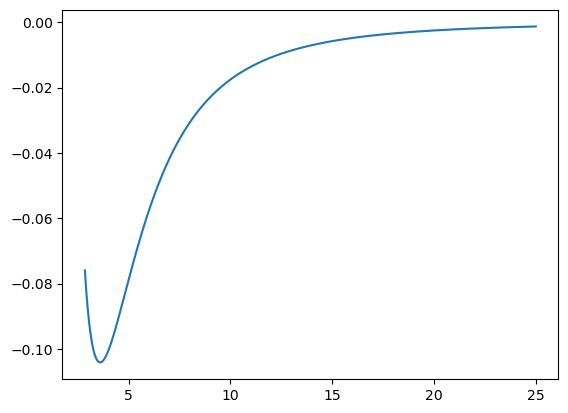

In [56]:
plt.plot(sig, y);

In [49]:
optsig=fmin(strength,l/3)[0]
print(optsig)

Optimization terminated successfully.
         Current function value: -0.104107
         Iterations: 15
         Function evaluations: 30
3.5961473253038214


In [50]:
optsig

3.5961473253038214